
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

# classification
Since it has categotical answer

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [66]:
# Read student data
df=pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [67]:
# Calculate number of students
index=df.index
n_students=len(index)
n_students

395

In [68]:
# Calculate number of features
columns=df.columns
n_features=len(columns)
n_features

31

In [69]:
# Calculate passing students
n_passed=df['passed'].value_counts()['yes']
n_passed

265

In [70]:
# Calculate failing students
n_failed=df['passed'].value_counts()['no']
n_failed

130

In [71]:
# Calculate graduation rate
grad_rate=(n_passed/(n_passed+n_failed))*100
grad_rate

67.08860759493672

In [72]:
# Print the results
print('number of students=',n_students)
print('number of features=',n_features)
print('passing students=',n_passed)
print('failing students=',n_failed)
print('graduation rate=',round(grad_rate,3))

number of students= 395
number of features= 31
passing students= 265
failing students= 130
graduation rate= 67.089


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [73]:
# Extract feature columns

In [74]:
df.drop('passed',axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [75]:
# Extract target column 'passed'

In [76]:
df['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [77]:
# Separate the data into feature data and target data (X and y, respectively)

In [78]:
X=df.drop(['passed'],axis=1)
y=df['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [94]:
#implementing one hot encoding
X = pd.get_dummies(X)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [95]:
# splitting the data into train and test


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.24)

In [97]:
# Show the results of the split
print("Training feature set size: ", X_train.shape," target set size: ", y_train.shape,"\nTesting feature set size: ", X_test.shape," target set size: ", y_train.shape)

Training feature set size:  (300, 56)  target set size:  (300,) 
Testing feature set size:  (95, 56)  target set size:  (300,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

## Three models:Since this is a binary classification problem, we can choose:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

# Explaination
### Logistic Regression
Logistic regression is the classification counterpart to linear regression. Predictions are mapped to be between 0 and 1 through the logistic function, which means that predictions can be interpreted as class probabilities.
The models themselves are still "linear," so they work well when your classes are linearly separable.

Strengths: Outputs have a nice probabilistic interpretation, and the algorithm can be regularized to avoid overfitting. Logistic models can be updated easily with new data using stochastic gradient descent.

Weaknesses: Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships.

### K-Nearest Neighbours

Applications of KNN
1. Text mining.
2. Agriculture.
3. Finance.
4. Medical.
5. Facial recognition.

Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.


### Support vector machines (SVM) 

SVM use a mechanism called kernels, which essentially calculate distance between two observations. The SVM algorithm then finds a decision boundary that maximizes the distance between the closest members of separate classes.
For example, an SVM with a linear kernel is similar to logistic regression. Therefore, in practice, the benefit of SVM's typically comes from using non-linear kernels to model non-linear decision boundaries.

Strengths: SVM's can model non-linear decision boundaries, and there are many kernels to choose from. They are also fairly robust against overfitting, especially in high-dimensional space.

Weaknesses: However, SVM's are memory intensive, trickier to tune due to the importance of picking the right kernel, and don't scale well to larger datasets. Currently in the industry, random forests are usually preferred over SVM's.


In [98]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [99]:
# fit model-1  on traning data 

In [100]:
log_r=LogisticRegression()
log_r.fit(X_train,y_train)

C:\Users\NJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
# predict on the test data 

In [102]:
y_pred=log_r.predict(X_test)

In [103]:
# calculate the accuracy score

In [104]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.7157894736842105


In [105]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [106]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predict=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)


In [107]:
acc_values

[0.631578947368421,
 0.6842105263157895,
 0.6947368421052632,
 0.631578947368421,
 0.6526315789473685,
 0.6210526315789474,
 0.6526315789473685,
 0.6105263157894737,
 0.6421052631578947,
 0.631578947368421,
 0.6421052631578947,
 0.6526315789473685]

Text(0, 0.5, 'accuracy')

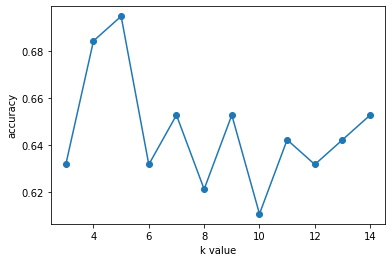

In [108]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [109]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [110]:
print("Accuracy is:",accuracy_score(y_test,y_predict))

Accuracy is: 0.6947368421052632


In [111]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [112]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pre=svm_linear.predict(X_test)

In [113]:
print("Accuracy is:",accuracy_score(y_test,y_pre))

Accuracy is: 0.6947368421052632


# Insight
    Accuracy is the heighest for Logistic Regression and hence it is the best model in the 3 for this case